# How to make random graphs and weighted graphs in networkX

## Random graphs

There are two main ways to generate a random graph: 

+ Specify the **number of vertices** that the graph should have and a **probability** that any two vertices will be connected by an edge. Or, 
+ Specify the **number of vertices** that the graph should have and the **number of edges** that the graph should have, and pull a random graph from the library of all possible graphs with those numbers of vertices and edges. 

In networkX, both of these methods (and several others) are implemented as methods that are part of the `random_graphs` sub-library. 

### Random graphs using number of vertices + probability method

To generate a random graph using the number of vertices + probability method, the syntax is

    nx.random_graphs.gnp_random_graph(n,p)
    
where `n` is the number of vertices and `p` is the probability, a number between 0 and 1 expressing the likelihood of vertices being connected. 

For example, here is a random graph with 10 vertices in which there is a 50/50 chance that two different vertices are connected: 

In [ ]:
# First load the networkx library
import networkx as nx

In [ ]:
g1 = nx.random_graphs.gnp_random_graph(10,0.5)

Let's visualize this: 

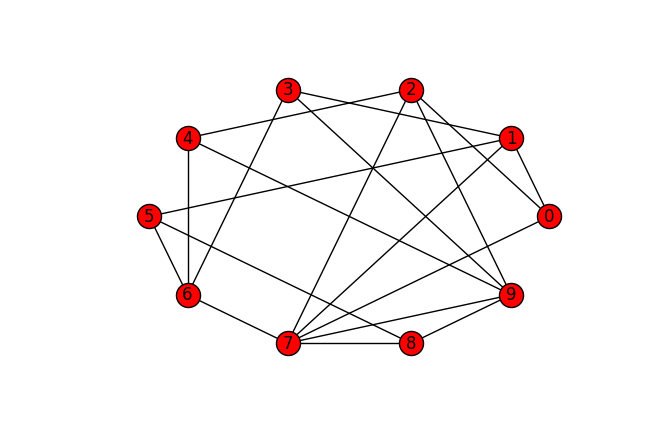

In [ ]:
import matplotlib.pyplot as plt

nx.draw(g1, pos=nx.circular_layout(g1), with_labels=True)
plt.show()

Running the same code twice will yield (almost certainly) a different graph: 

g2 = nx.random_graphs.gnp_random_graph(10,0.5)
nx.draw(g2, pos=nx.circular_layout(g2), with_labels=True)
plt.show()

Here's the same graph with a much lower probability of connection:

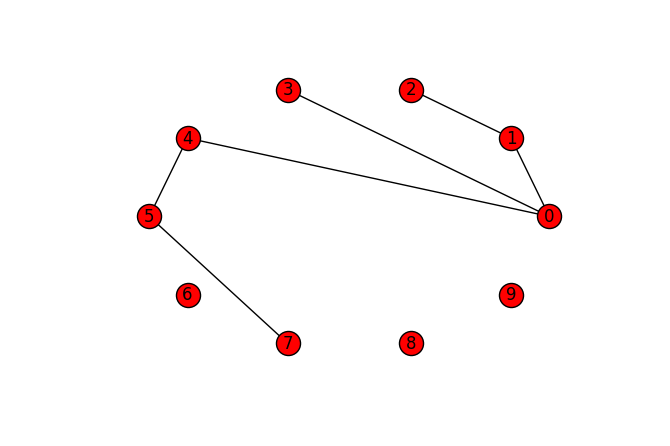

In [ ]:
g3 = nx.random_graphs.gnp_random_graph(10,0.1)
nx.draw(g3, pos=nx.circular_layout(g3), with_labels=True)
plt.show()

### Random graphs using number of vertices + number of edges method

To generate a random graph using the number of vertices + number of edges method, use the syntax 

    nx.random_graphs.gnm_random_graph(n,m)
    
where `n` is the number of vertices and `m` is the number of edges. For example, here's a random graph with 12 vertices and 20 edges: 

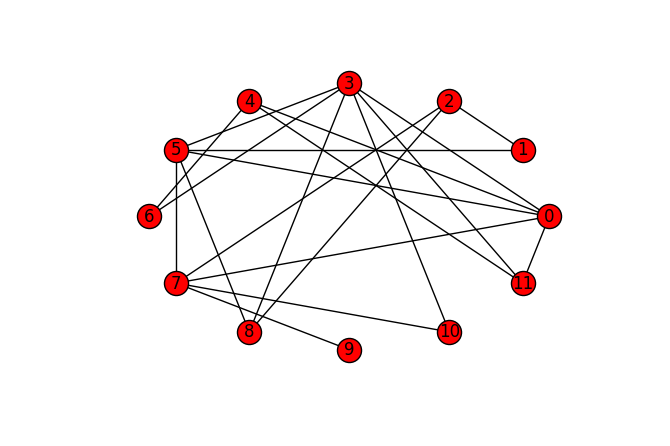

In [ ]:
g4 = nx.random_graphs.gnm_random_graph(12,20)
nx.draw(g4, pos=nx.circular_layout(g4), with_labels=True)
plt.show()

## Weighted graphs

Weighted graphs can be created in networkX just by passing the weight information for an edge when you make the graph. Generally speaking, a weighted edge is formatted as an ordered _triple_ that has the following format: 

+ The first two entries in the triple are the vertices that the edge connects. 
+ The third entry is a single-element dictionary of the form `{str:weight}` where `str` is a string identifying the name of the data being added as a weight, and `weight` is the data added to the edge (usually a number). 

For example, here is an example where we construct the graph using a list of weighted edges: 

In [ ]:
wg1 = nx.Graph([('d', 'c', {'weight': 0.1}),
 ('d', 'a', {'weight': 0.3}),
 ('e', 'c', {'weight': 0.7}),
 ('a', 'c', {'weight': 0.2}),
 ('a', 'b', {'weight': 0.6}),
 ('c', 'f', {'weight': 0.9})])

A slightly easier way to do this is to start with an empty graph and add weighted edges one at a time. This is slightly easier because using the `add_edge()` method doesn't require you to enter the weights as dictionaries. Here's an example of a four-vertex weighted graph: 

In [ ]:
wg2 = nx.Graph()

wg2.add_edge('r','s',wt = 12)
wg2.add_edge('r','t',wt = 10)
wg2.add_edge('s','t',wt =  8)

To get networkX to list the edges with the weights, use the `.edges()` method with the extra argument `data=True`:

In [ ]:
wg1.edges(data=True)

[('a', 'd', {'weight': 0.3}),
 ('a', 'b', {'weight': 0.6}),
 ('a', 'c', {'weight': 0.2}),
 ('e', 'c', {'weight': 0.7}),
 ('c', 'd', {'weight': 0.1}),
 ('c', 'f', {'weight': 0.9})]

In [ ]:
wg2.edges(data=True)

[('s', 'r', {'wt': 12}), ('s', 't', {'wt': 8}), ('r', 't', {'wt': 10})]

To visualize weighted graphs with the weights displayed on the edges, there's a process to follow: 

+ First define `pos`, a variable that controls the position of the vertices. For simplicity you can set this equal to `nx.spring_layout(G)` which arranges the vertices in a standard layout, or `nx.circular_layout(G)` which arranges them in a circle. 
+ Then use `nx.draw(G,pos)` to draw the graph itself without the edge labels. 
+ Then enter `labels = nx.get_edge_attributes(G, 'weight')` to store the edge labels. This assumes your graph is called `G` and the string you used to identify the weight is called `weight`. 
+ Then enter `nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)`. This draws the labels as an overlay onto the graph you drew. 
+ Finally to visualize the combination of graph and labels, enter `plt.show()`. 

Here's an example using the first weighted graph above:

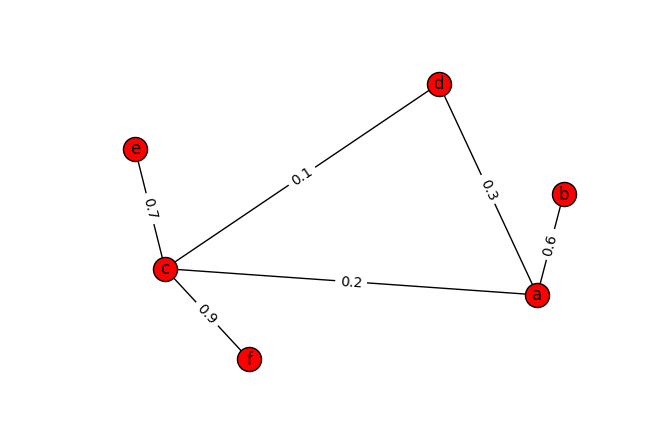

In [ ]:
wg1 = nx.Graph([('d', 'c', {'weight': 0.1}),
 ('d', 'a', {'weight': 0.3}),
 ('e', 'c', {'weight': 0.7}),
 ('a', 'c', {'weight': 0.2}),
 ('a', 'b', {'weight': 0.6}),
 ('c', 'f', {'weight': 0.9})])

pos = nx.spring_layout(wg1)
nx.draw(wg1,pos, with_labels=True)   # Added the with_labels = True to show vertex labels
labels = nx.get_edge_attributes(wg1, 'weight')
nx.draw_networkx_edge_labels(wg1,pos,edge_labels=labels)
plt.show()

## Bonus: Code for generating a random weighted graph

In [ ]:
'''
Generates a random weighted graph. 
n = Number of nodes. 
p = Probability of two nodes being connected. Must be between 0 and 1. 
Weights on the edges are randomly generated integers situated between lower_weight and upper_weight. 
Example: random_weighted_graph(6, 0.25, 10, 20) creates a weighted graph with 6 nodes, a 1/4 probability 
of two nodes being connected, and weights on the edges randomly selected between 10 and 20. 
'''

def gnp_random_weighted_graph(n,p,wlow,whigh):
    import random
    G = nx.random_graphs.gnp_random_graph(n,p) 
    m = G.number_of_edges()
    weights = [random.randint(wlow,whigh) for r in range(m)]
    unweighted_edges = G.edges()
    weighted_edges = [(unweighted_edges[i][0], unweighted_edges[i][1], {'weight':weights[i]}) for i in range(m)]
    return nx.Graph(weighted_edges)

This code is also found here: https://gist.github.com/RobertTalbert/40620892ecc468e5f8dbf5dd1170aa44

Example of use: Generating a random graph with 10 vertices, a probability of 1/4 of connection, and integer weights randomly selected between 10 and 50, then plotting it using the directions above. 

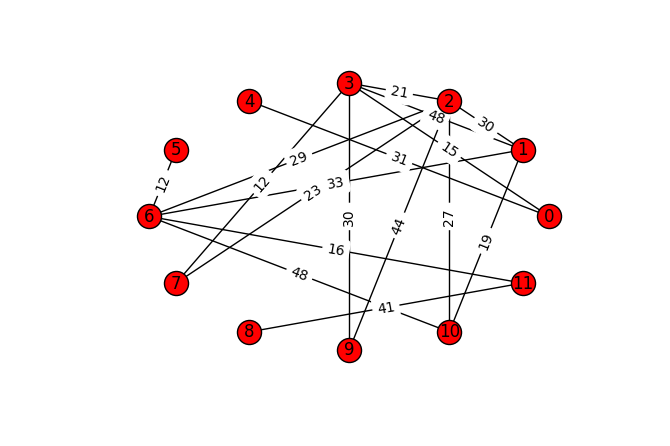

In [ ]:
G = gnp_random_weighted_graph(12,0.25,10,50)

pos = nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()